In [8]:
from torchvision import datasets, transforms, utils
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

In [55]:
trans_cifar = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trans_cifar = transforms.Compose([transforms.ToTensor()])
trans_cifar1 = transforms.Compose([transforms.Resize (64), transforms.ToTensor()])
dataset0 = datasets.CIFAR10(root='./datasets/cifar/', train=True, download=True, transform=None)
dataset = datasets.CIFAR10(root='./datasets/cifar/', train=True, download=True, transform=trans_cifar)
dataset1 = datasets.CIFAR10(root='./datasets/cifar/', train=True, download=True, transform=trans_cifar1)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# transformed = dataset1.transforms(dataset1.data[0],transforms.ToTensor())
# # print(type(ztransformed))
# # print(min(transformed),max(transformed))
# # print(len(transformed))
# print(len(transformed[0][0]))
# for i in transformed[0]:
#     for j in i:
#         print(max(j).item(), min(j).item())
#         # for k in j:
#         #     print(k)
#         #     print('---------------')

<class 'numpy.ndarray'>


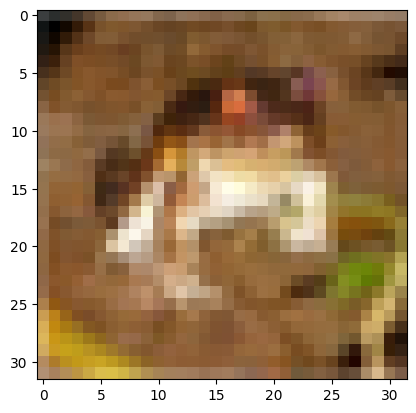

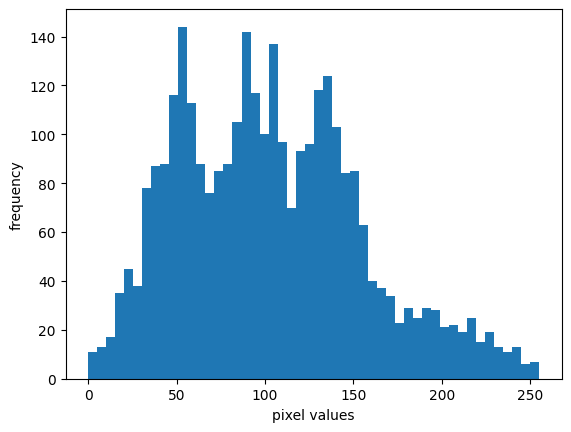

Text(0, 0.5, 'frequency')

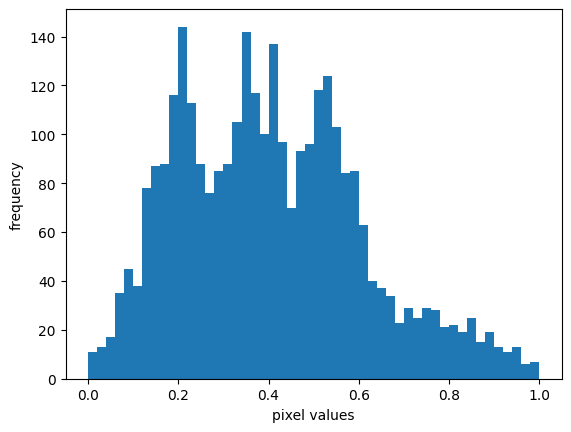

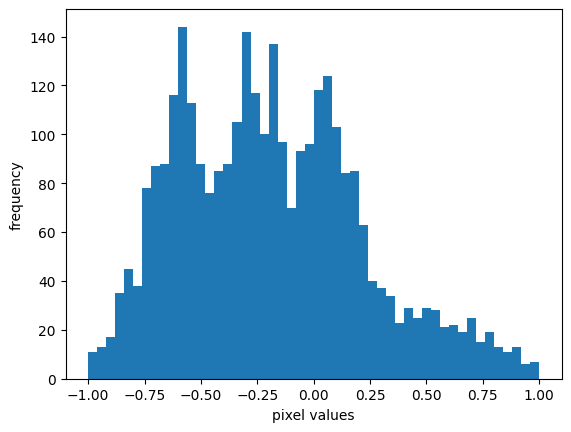

In [4]:
image = (dataset.data[0])
print(type(image))
plt.figure('1')
plt.imshow(image)

plt.figure('2')
plt.hist(image.ravel(), bins=50, density=False)
plt.xlabel("pixel values")
plt.ylabel("frequency")
plt.show()
image = (dataset.data[0])
transform = transforms.Compose([
    transforms.ToTensor()
])

img_tr = transform(image)

img_np = np.array(img_tr)
plt.figure('3')
plt.hist(img_np.ravel(), bins=50, density=False)
plt.xlabel("pixel values")
plt.ylabel("frequency")

image = (dataset.data[0])
img_tr = trans_cifar(image)

img_np = np.array(img_tr)
plt.figure('4')
plt.hist(img_np.ravel(), bins=50, density=False)
plt.xlabel("pixel values")
plt.ylabel("frequency")

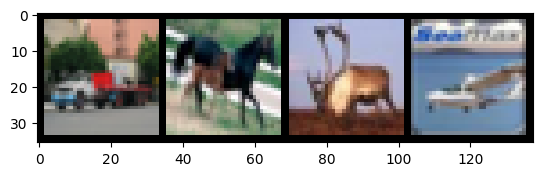

In [59]:
trainloader1 = torch.utils.data.DataLoader(dataset1, shuffle = True,batch_size=4) 
trainloader = torch.utils.data.DataLoader(dataset, shuffle = True,batch_size=4)
dataiter1 = iter(trainloader1)
dataiter = iter(trainloader)

images1, _ = dataiter1.next()
images, _ = dataiter.next()

img1= utils.make_grid(images1)
img= utils.make_grid(images)

npimg = img.numpy()
npimg = np.transpose(npimg, (1, 2, 0))

plt.imshow(npimg)




In [80]:
print(images1.shape)
m = nn.ConvTranspose2d(in_channels=3, out_channels=3, kernel_size=4, stride=2, padding=1, bias = False)
# image=np.transpose((1, 2, 0))
# image=torch.tensor(images1)

output = m(images)
# print(output.shape)
# output = np.transpose(output.cpu().detach().numpy(),(0,2,3,1))
# print(output[0].shape)
# plt.imshow(output[0])
img= utils.make_grid(output)

npimg = img.numpy()
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)
plt.imshow(npimg)

torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])


TypeError: tensor or list of tensors expected, got <class 'numpy.ndarray'>

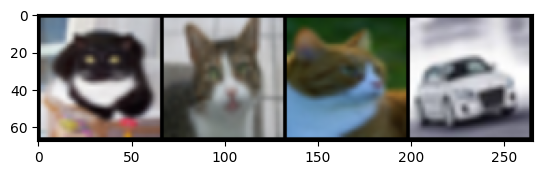

In [100]:
npimg1 = img1.numpy()
npimg1 = np.transpose(npimg1, (1, 2, 0))

plt.imshow(npimg1)


In [17]:
torch.randn(32)

tensor([ 2.6651e+00, -6.8274e-01, -1.5681e+00,  5.1670e-01,  3.6915e-01,
        -6.0122e-01, -1.4136e+00,  7.6891e-02,  3.0975e-01,  8.9367e-01,
         2.9228e-01, -1.8923e+00, -6.7329e-01,  2.3181e+00,  1.9144e-01,
        -8.3543e-01,  2.5476e-01,  1.9697e+00,  6.6615e-02,  1.9388e-01,
         2.1820e+00,  1.2005e-01, -6.8575e-01, -6.1358e-01,  1.9124e+00,
         6.0938e-01,  1.6736e-03,  1.0793e+00,  1.1605e+00,  1.3869e+00,
        -2.8808e-01, -1.9087e+00])

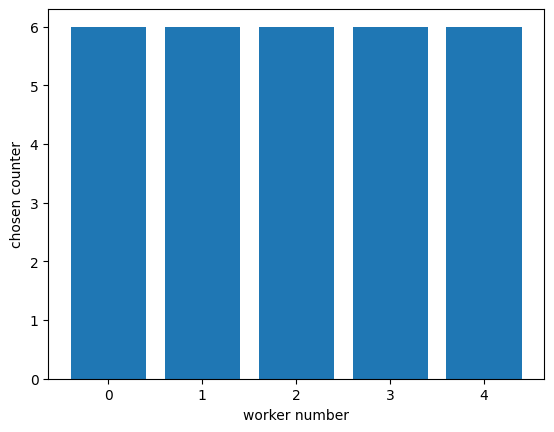

In [11]:
worker_chosen_counter= [6 for i in range(5)]
plt.bar(range(len(worker_chosen_counter)),worker_chosen_counter)
plt.xlabel('worker number')
plt.ylabel('chosen counter')
plt.show()